In [1]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau

import numpy as np
import pandas as pd

import model_predict
from sklearn.model_selection import train_test_split

In [2]:
series, scaler = model_predict.read_data_series(scale=True)

In [19]:
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRUModel, self).__init__()
        self.cn = nn.Conv1d(input_size, input_size, 3, padding=1)
        self.gru = nn.GRU(input_size, hidden_size,
                          num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.cn(x.permute(0, 2, 1)).permute(0, 2, 1)
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])  # 使用最后一个时间步的输出
        return out


model_parameters = {
    "input_size": 3, "hidden_size": 16, "num_layers": 1, "output_size": 1
}

In [20]:
model_predict.train_rnn_model(GRUModel, model_parameters, series, epochs=600)

训练 GRUModel 模型
结果保存到： GRUModel_best.pth
Epoch [50/1500], Learn Rate: 1.0000e-03, Training Loss: 0.5440, Validation Loss: 0.1251
Epoch [100/1500], Learn Rate: 1.0000e-03, Training Loss: 0.4007, Validation Loss: 0.1314
Epoch [150/1500], Learn Rate: 1.0000e-03, Training Loss: 0.3281, Validation Loss: 0.1317
Epoch [200/1500], Learn Rate: 1.0000e-03, Training Loss: 0.1544, Validation Loss: 0.2180
Epoch [250/1500], Learn Rate: 1.0000e-03, Training Loss: 0.0837, Validation Loss: 0.1862
Epoch [300/1500], Learn Rate: 1.0000e-03, Training Loss: 0.0602, Validation Loss: 0.1754
Epoch [350/1500], Learn Rate: 1.0000e-03, Training Loss: 0.0439, Validation Loss: 0.1769
Epoch [400/1500], Learn Rate: 1.0000e-03, Training Loss: 0.0328, Validation Loss: 0.1752
Epoch [450/1500], Learn Rate: 1.0000e-03, Training Loss: 0.0249, Validation Loss: 0.1717
Epoch [500/1500], Learn Rate: 1.0000e-03, Training Loss: 0.0178, Validation Loss: 0.1711
Epoch [550/1500], Learn Rate: 1.0000e-03, Training Loss: 0.0109, Valida

从2018年9月开始后续数据推理
MSE: 21.51
MAE: 2.34
R^2: 0.98
MAPE: 0.04


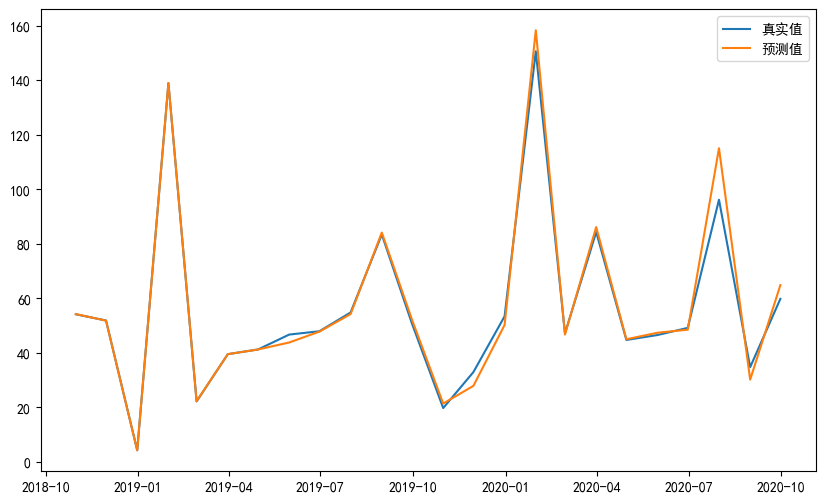

array([ 54.23729194,  51.82291096,   4.30889944, 138.90694773,
        22.28049192,  39.53665317,  41.26140203,  43.81990375,
        47.80183409,  54.22305401,  84.11449113,  52.17300323,
        21.44516603,  27.91487716,  50.23299517, 158.2678095 ,
        46.7214065 ,  86.12612065,  45.00930039,  47.40239705,
        48.50784831, 115.02677062,  30.20726207,  64.84667185])

In [21]:
model = model_predict.load_rnn_model_best(GRUModel, model_parameters)
model_predict.predict_to_future_rnn(model, series, scaler, last_months=24)